In [1]:
from pathlib import Path
import os
import pandas as pd

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

from nanoHUB.rfm.functions import CacheDirs, elbow_curve, display_cluster_info

nanoHUB - Serving Students, Researchers & Instructors


In [2]:
cached_dirs = CacheDirs()

In [3]:
df = pd.read_csv(
    Path(cached_dirs.cache_dir, 'unclassified_user_data_iteration5.csv'),
    index_col=False
)
display(df)

,index,Unnamed: 0,user,first_start_date,last_start_date,first_finish_date,last_finish_date,job_count,superjob_count,job_event_days,superjob_event_days,last_superjob_start_date,toolevents__lifetime,start_datetime
0,19,19,061962588x,2021-04-28 01:54:30,2021-05-27 01:09:33,2021-04-28 03:31:52,2021-05-27 11:19:13,40,NaN,5,NaN,NaN,29,2021-04-28 01:54:30
1,20,20,061972018x,2021-04-28 02:17:04,2021-05-27 01:13:31,2021-04-28 02:40:49,2021-05-28 01:20:45,66,NaN,4,NaN,NaN,29,2021-04-28 02:17:04
2,26,26,0808wodlr,2020-11-10 00:04:08,2020-12-08 23:24:41,2020-11-11 00:12:54,2020-12-09 23:28:55,13,NaN,2,NaN,NaN,29,2020-11-10 00:04:08
3,92,92,12422rahulkumar,2020-09-25 04:02:01,2021-01-05 04:31:11,2020-09-26 07:49:27,2021-01-06 04:38:54,172,NaN,6,NaN,NaN,103,2020-09-25 04:02:01
4,110,110,13rahul129,2021-05-13 00:20:48,2021-06-04 12:43:29,2021-05-14 00:23:50,2021-06-04 12:58:37,125,NaN,9,NaN,NaN,22,2021-05-13 00:20:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,155160,155160,zy2421,2021-02-14 04:29:11,2021-02-16 09:13:55,2021-02-14 21:40:06,2021-02-24 14:01:43,372,NaN,3,NaN,NaN,10,2021-02-14 04:29:11
4986,155226,155226,zyzhu,2021-01-30 00:58:07,2021-06-16 11:26:48,2021-01-31 01:11:58,2021-06-17 11:27:52,7,NaN,2,NaN,NaN,138,2021-01-30 00:58:07
4987,155258,155258,zzhang81,2020-08-26 12:11:38,2020-09-02 12:22:57,2020-08-26 12:12:35,2020-09-03 13:50:35,193,NaN,2,NaN,NaN,8,2020-08-26 12:11:38
4988,155268,155268,zzhou436,2021-06-21 06:37:27,2021-07-25 08:57:28,2021-06-22 06:37:51,2021-07-26 10:37:37,28,NaN,8,NaN,NaN,35,2021-06-21 06:37:27


In [4]:
users = pd.DataFrame(df['user'].unique())
users.columns = ['user']

In [5]:
recency_df = df[['user', 'toolevents__lifetime']].copy()
recency_df['Recency'] = recency_df['toolevents__lifetime']

users = pd.merge(users, recency_df[['user','Recency', 'toolevents__lifetime']], on='user')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


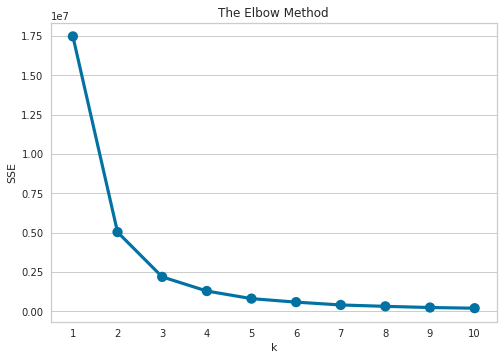

In [6]:
elbow_curve(users[['Recency']])

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(users[['Recency']])
users['RecencyCluster'] = kmeans.predict(users[['Recency']])

In [8]:
display(users.groupby('RecencyCluster')['Recency'].describe())

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,3505.0,17.081027,13.700159,2.0,5.0,13.0,27.0,51.0
1,422.0,204.933649,46.420779,146.0,166.0,195.0,237.0,338.0
2,1063.0,85.973659,24.365030,52.0,66.0,83.0,102.0,145.0


In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Recency']])
users['RecencyCluster'] = kmeans.predict(users[['Recency']])
display(users.groupby('RecencyCluster')['Recency'].describe())

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,1073.0,71.630009,18.513411,44.0,56.0,70.0,86.0,110.0
1,407.0,148.540541,24.189985,111.0,127.0,148.0,168.0,196.0
2,3305.0,15.223601,11.757432,2.0,5.0,12.0,24.0,43.0
3,205.0,244.448780,33.947098,197.0,216.0,238.0,269.0,338.0


In [10]:
users.to_csv(
    Path(cached_dirs.cache_dir, "recency_by_toolevent_iteration_5-1-week.csv"),
    index=False,
    index_label=False
)

In [11]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(users[['Recency']])
display(X_scaled)

array([[0.08035714],
       [0.08035714],
       [0.08035714],
       ...,
       [0.01785714],
       [0.09821429],
       [0.17261905]])

Score for number of cluster(s) 2: -44.639056570641195
Silhouette score for number of cluster(s) 2: 0.7396747536087146
Davies Bouldin score for number of cluster(s) 2: 0.4825915998538248


'Centroids - '

[[0.07287656]
 [0.48630561]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -19.44577658151961
Silhouette score for number of cluster(s) 3: 0.6846690075697603
Davies Bouldin score for number of cluster(s) 3: 0.4838614669811207


'Centroids - '

[[0.04488401]
 [0.60396919]
 [0.24992161]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -11.480913307981183
Silhouette score for number of cluster(s) 4: 0.6637716757565575
Davies Bouldin score for number of cluster(s) 4: 0.4897842299968748


'Centroids - '

[[0.42730619]
 [0.03844557]
 [0.71413415]
 [0.20258828]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -7.211904281830841
Silhouette score for number of cluster(s) 5: 0.6225968729747018
Davies Bouldin score for number of cluster(s) 5: 0.49653753156209024


'Centroids - '

[[0.45030416]
 [0.10751179]
 [0.24341238]
 [0.72364156]
 [0.02184111]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -5.237574441251812
Silhouette score for number of cluster(s) 6: 0.6178056479819128
Davies Bouldin score for number of cluster(s) 6: 0.5124997120454485


'Centroids - '

[[0.02262403]
 [0.57049677]
 [0.2340935 ]
 [0.79140787]
 [0.10825665]
 [0.39222433]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -3.640292595190638
Silhouette score for number of cluster(s) 7: 0.6152453937003354
Davies Bouldin score for number of cluster(s) 7: 0.48527253098659173


'Centroids - '

[[0.83994709]
 [0.01840584]
 [0.28912602]
 [0.17935681]
 [0.4497549 ]
 [0.08682056]
 [0.63612611]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -2.861790070651228
Silhouette score for number of cluster(s) 8: 0.6143286332708425
Davies Bouldin score for number of cluster(s) 8: 0.490195205964729


'Centroids - '

[[0.39768547]
 [0.01840584]
 [0.66426795]
 [0.17441233]
 [0.08593953]
 [0.27293707]
 [0.84825938]
 [0.51912986]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -2.206908787966097
Silhouette score for number of cluster(s) 9: 0.588012106016676
Davies Bouldin score for number of cluster(s) 9: 0.5027097523125625


'Centroids - '

[[0.05659216]
 [0.51912986]
 [0.19229699]
 [0.27997835]
 [0.84688166]
 [0.11420032]
 [0.01170838]
 [0.66357859]
 [0.40034433]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -1.809011166563569
Silhouette score for number of cluster(s) 10: 0.5903685096076752
Davies Bouldin score for number of cluster(s) 10: 0.4928465734988013


'Centroids - '

[[0.00975602]
 [0.29821618]
 [0.66357859]
 [0.14585956]
 [0.84688166]
 [0.21497674]
 [0.41286946]
 [0.08966127]
 [0.0451819 ]
 [0.5241307 ]]
----------------------------------------------------------------------------------------------------


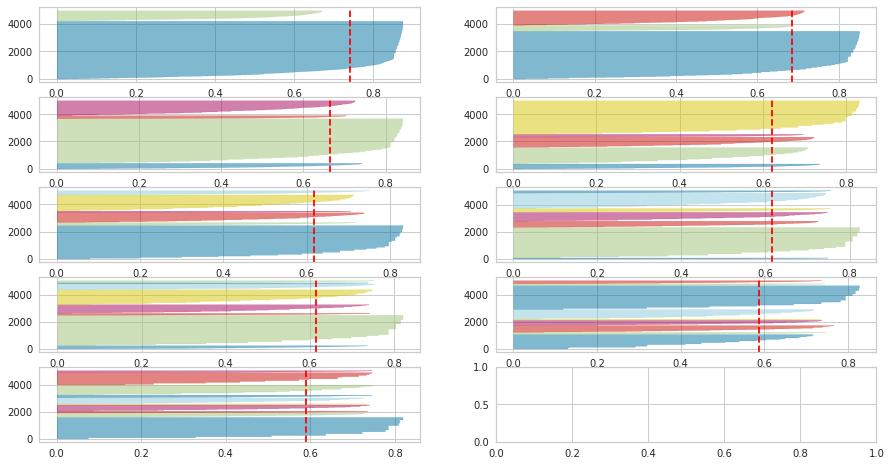

In [12]:
display_cluster_info(X_scaled)